In [1]:
!pip install fasteda

## Data Import and Understanding

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("./datasets/kg_tps_s3e12/train.csv")
test = pd.read_csv("./datasets/kg_tps_s3e12/test.csv")

train.shape, test.shape

((414, 8), (276, 7))

DataFrame Head:


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0


DataFrame Tail:


,id,gravity,ph,osmo,cond,urea,calc,target
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1
413,413,1.011,6.13,364,9.9,159,0.27,0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(414, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
id,414,206.5,206.5,119.656,0,103.25,206.5,309.75,413,0.000000,-1.200014
gravity,414,1.018,1.018,0.007,1.005,1.012,1.018,1.022,1.04,0.289954,-0.019158
ph,414,5.955,5.74,0.642,4.76,5.53,5.74,6.28,7.94,0.967785,0.595484
osmo,414,651.546,679.5,234.677,187,455.25,679.5,840,1236,0.146861,-0.496470
cond,414,21.438,22.2,7.515,5.1,15.5,22.2,27.6,38,-0.211240,-0.680120
urea,414,278.657,277,136.442,10,170,277,385,620,0.327913,-0.573939
calc,414,4.115,3.13,3.218,0.17,1.45,3.13,6.63,14.34,1.114477,0.640783
target,414,0.444,0,0.498,0,0,0,1,1,0.223607,-1.950000


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



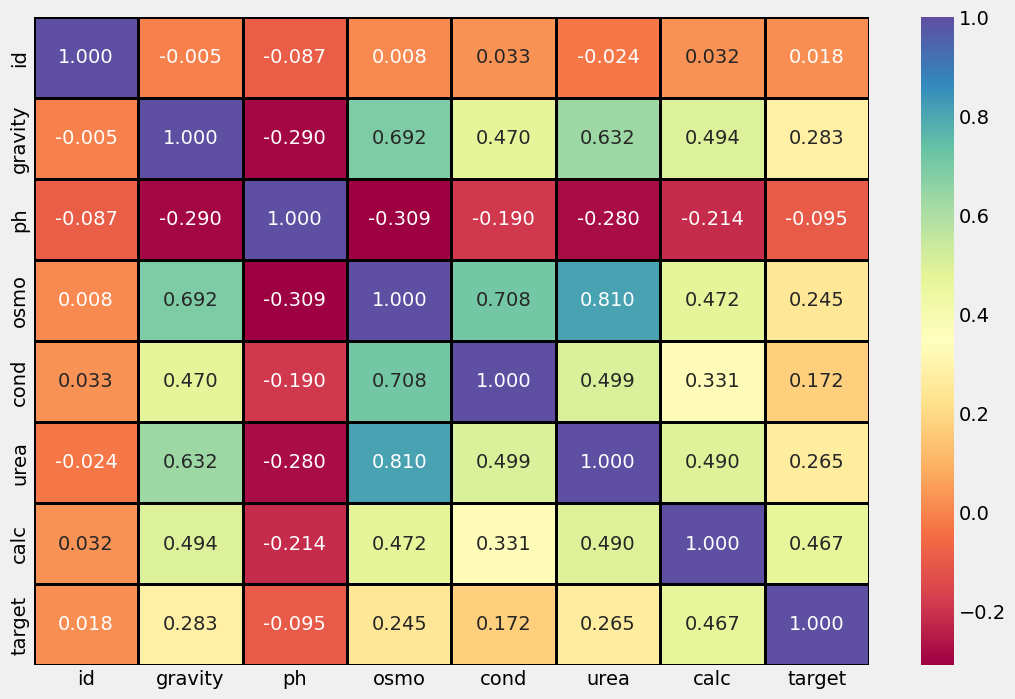

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



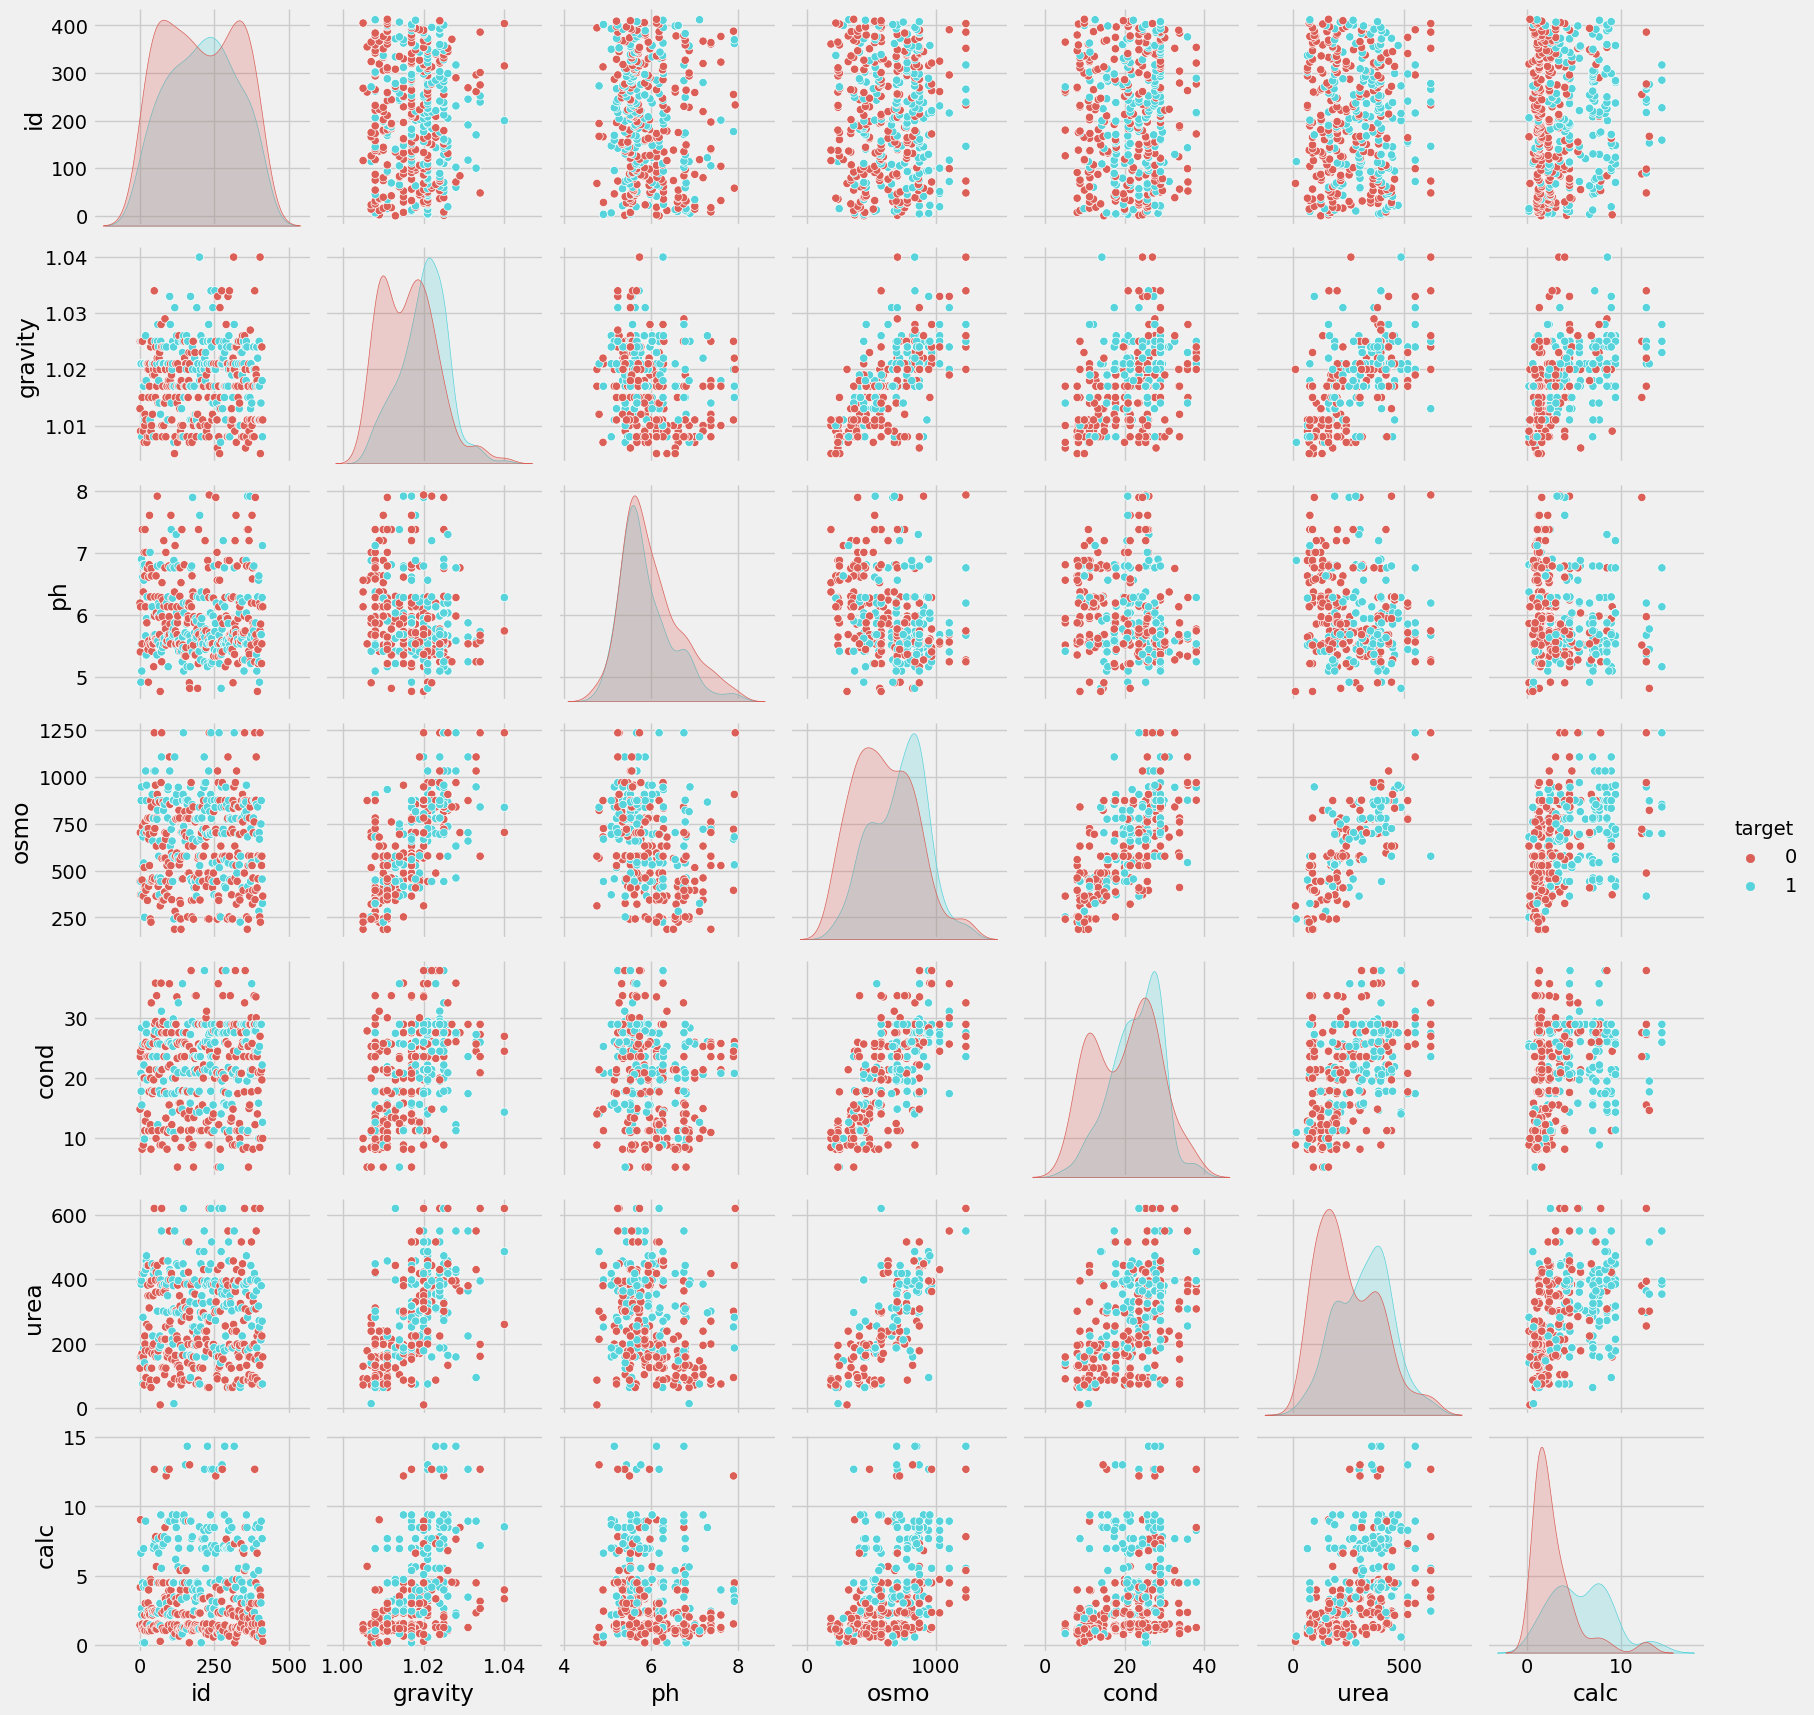

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



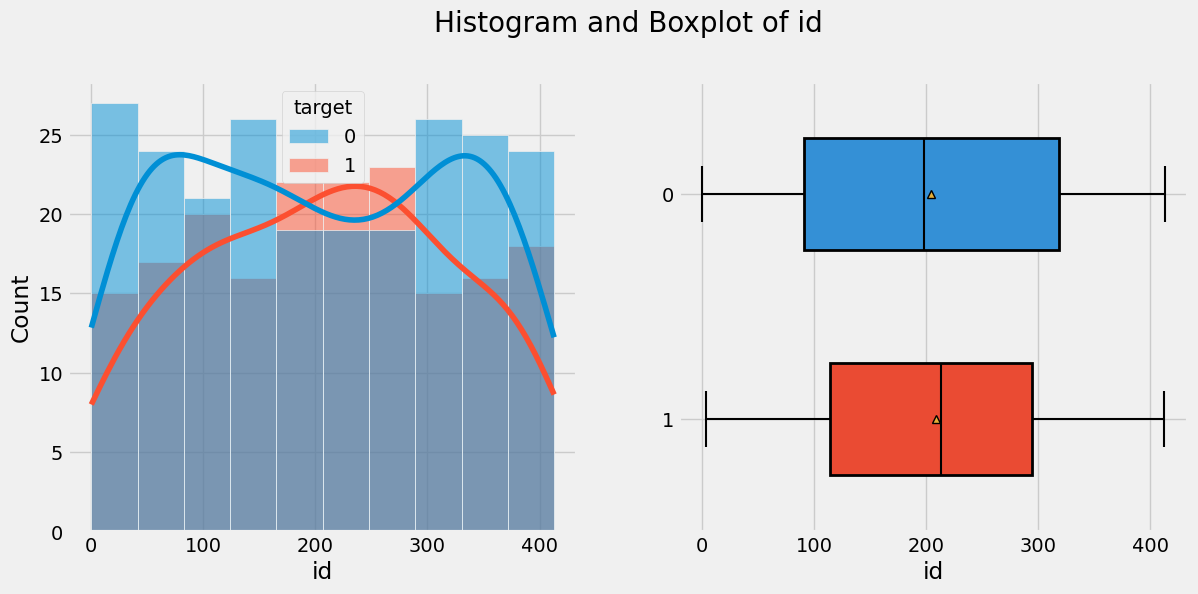

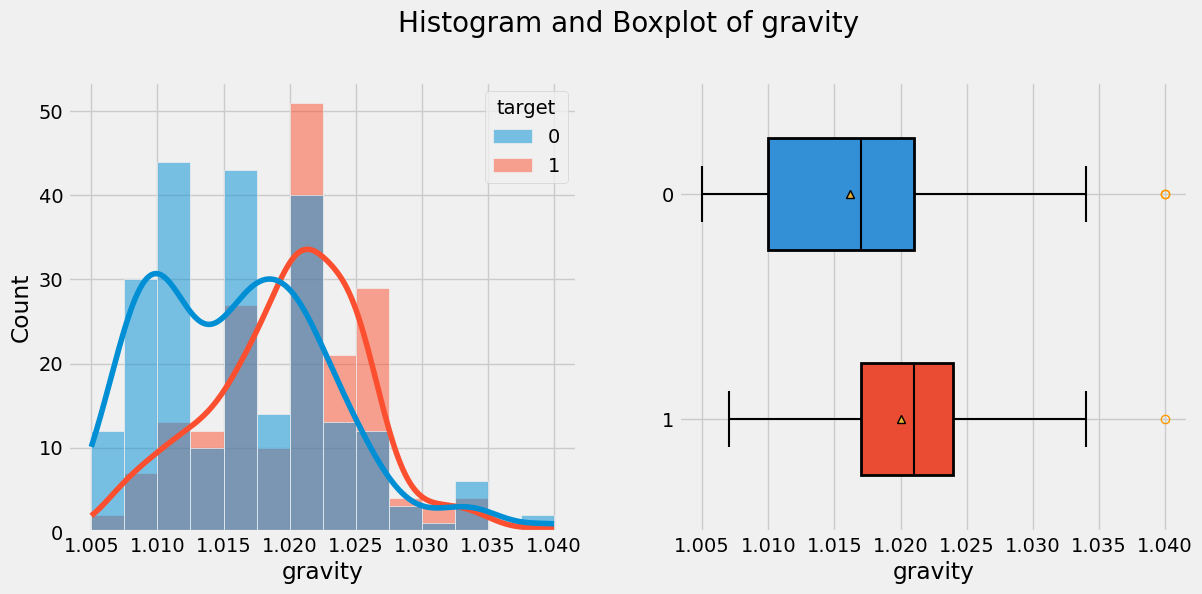

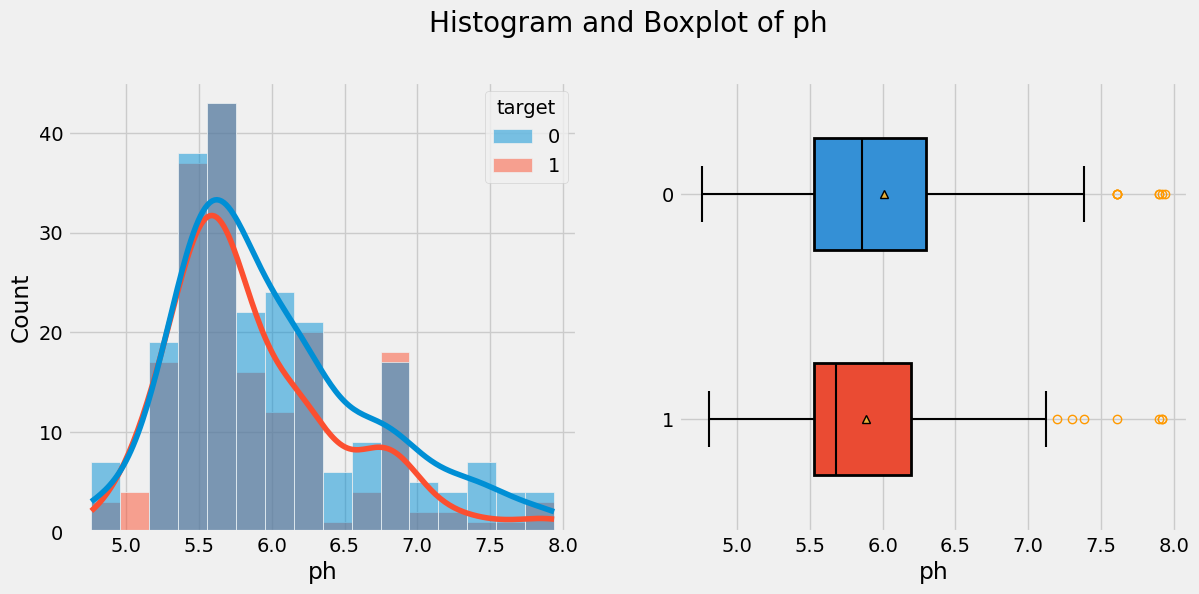

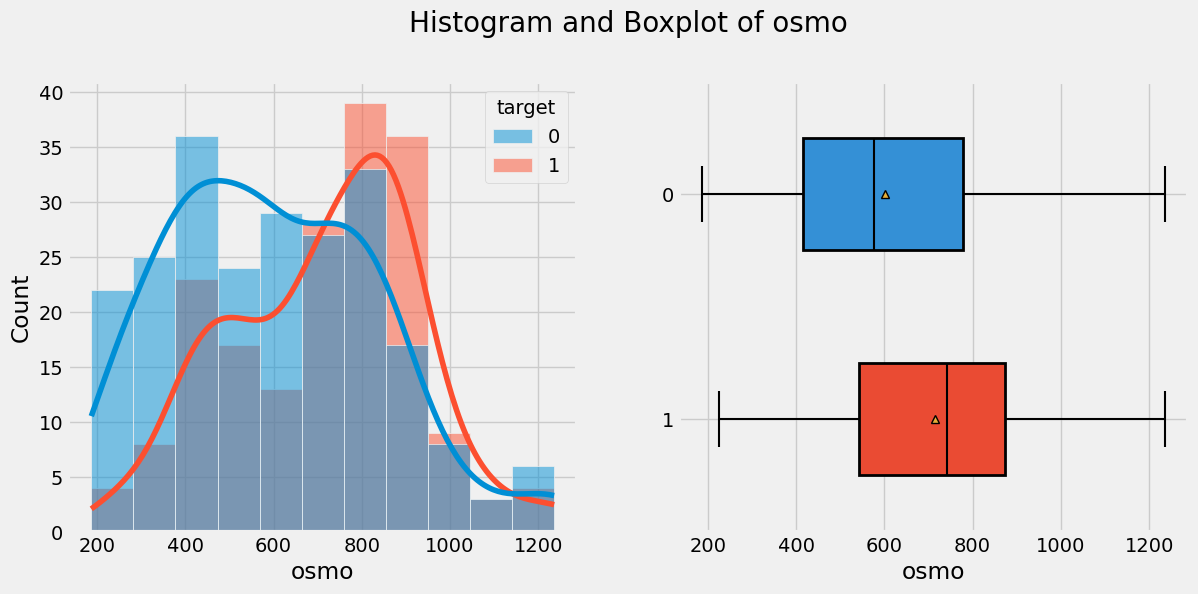

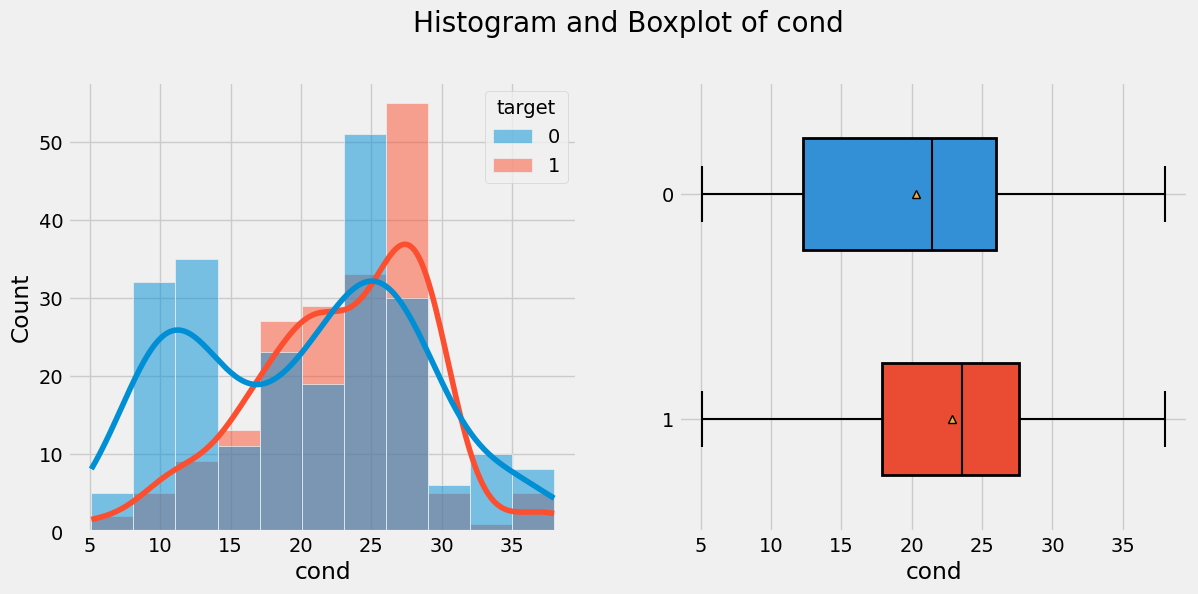

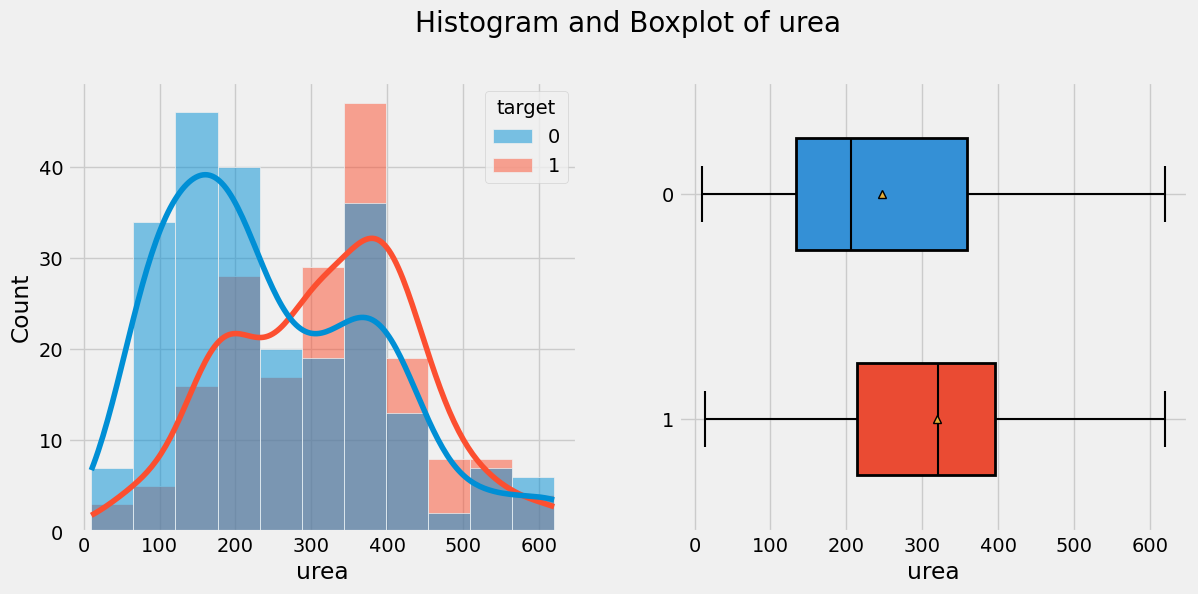

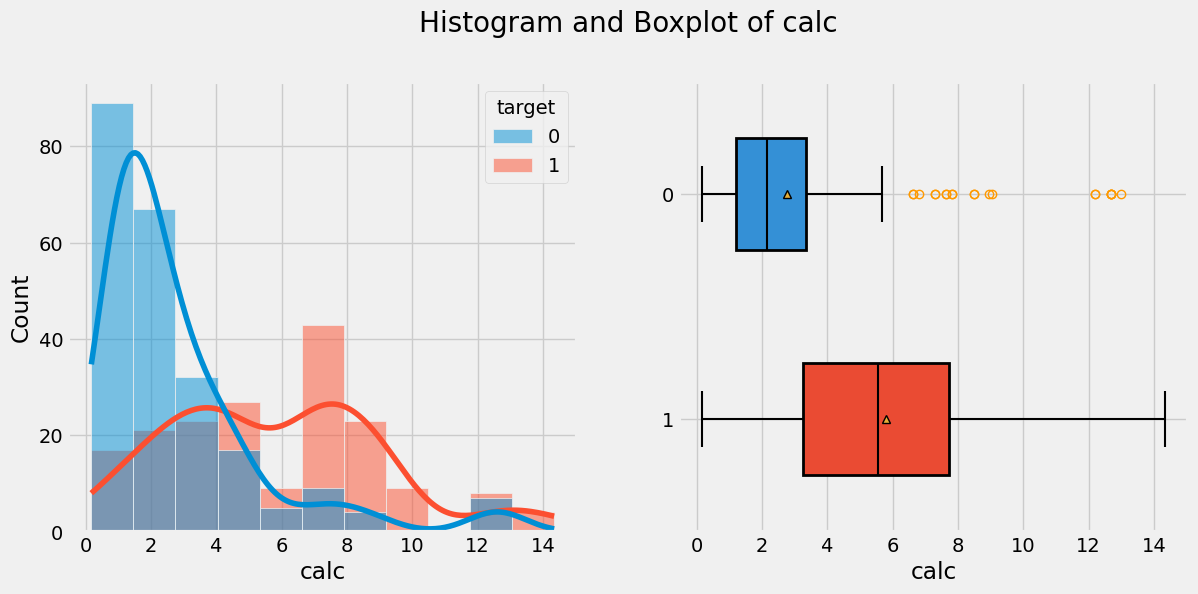

----------------------------------------------------------------------------------------------------
Countplot(s):



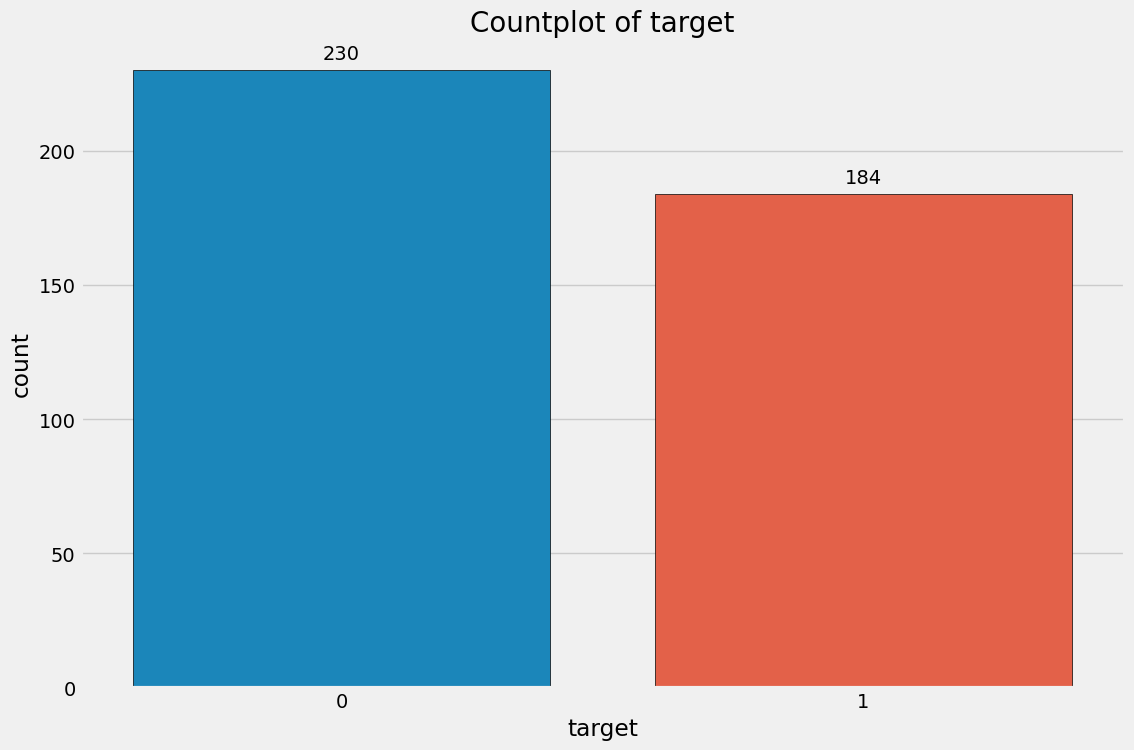

In [4]:
from fasteda import fast_eda
fast_eda(train, target='target')

## Data Preparation

In [5]:
from sklearn.preprocessing import MinMaxScaler
cols = train.columns
tr_scaler = MinMaxScaler().fit(train)
train = tr_scaler.transform(train)
train = pd.DataFrame(train, columns=cols)

cols = test.columns
te_scaler = MinMaxScaler().fit(test)
test = te_scaler.transform(test)
test = pd.DataFrame(test, columns=cols)

train.shape, test.shape

((414, 8), (276, 7))

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train.drop('target',axis=1), train['target'], test_size=0.1, shuffle=True, random_state=42)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((372, 7), (42, 7), (372,), (42,))

## Model Development

In [7]:
scores = {}

#### Support Vector Classifier

In [8]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)
scores['SVC'] = svc.score(train_x, train_y)
scores['SVC']

0.7956989247311828

In [9]:
svc.score(test_x, test_y)
svc_pred = svc.predict(test_x)

#### Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
scores['DTC'] = dtc.score(train_x, train_y)
scores['DTC']

1.0

In [11]:
dtc.score(test_x, test_y)
dtc_pred = dtc.predict(test_x)

#### Gradient Boosting Classifier

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y)
scores['GBC'] = gbc.score(train_x, train_y)
scores['GBC']

0.9489247311827957

In [13]:
gbc.score(test_x, test_y)
gbc_pred = gbc.predict(test_x)

#### Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
scores['RFC'] = rfc.score(train_x, train_y)
scores['RFC']

1.0

In [15]:
rfc.score(test_x, test_y)
rfc_pred = rfc.predict(test_x)

#### Deep Learning Model

In [16]:
import tensorflow as tf
import tensorflow.keras as keras

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential([
    Dense(512, activation='relu', input_shape=[7]),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [19]:
history = model.fit(train_x, 
                    train_y, 
                    epochs=150,
                   validation_data=(test_x, test_y),
                    verbose=2,
                    batch_size=32,
                    shuffle=True)

Epoch 1/150
12/12 - 3s - loss: 0.6920 - accuracy: 0.5108 - val_loss: 0.6598 - val_accuracy: 0.6667 - 3s/epoch - 211ms/step
Epoch 2/150
12/12 - 0s - loss: 0.6755 - accuracy: 0.6022 - val_loss: 0.6164 - val_accuracy: 0.7381 - 159ms/epoch - 13ms/step
Epoch 3/150
12/12 - 0s - loss: 0.6297 - accuracy: 0.6801 - val_loss: 0.5406 - val_accuracy: 0.7381 - 153ms/epoch - 13ms/step
Epoch 4/150
12/12 - 0s - loss: 0.6212 - accuracy: 0.6720 - val_loss: 0.5265 - val_accuracy: 0.7619 - 140ms/epoch - 12ms/step
Epoch 5/150
12/12 - 0s - loss: 0.6071 - accuracy: 0.7043 - val_loss: 0.5528 - val_accuracy: 0.6905 - 137ms/epoch - 11ms/step
Epoch 6/150
12/12 - 0s - loss: 0.6030 - accuracy: 0.7151 - val_loss: 0.5218 - val_accuracy: 0.8571 - 137ms/epoch - 11ms/step
Epoch 7/150
12/12 - 0s - loss: 0.5923 - accuracy: 0.7151 - val_loss: 0.5105 - val_accuracy: 0.7857 - 140ms/epoch - 12ms/step
Epoch 8/150
12/12 - 0s - loss: 0.5866 - accuracy: 0.7124 - val_loss: 0.5178 - val_accuracy: 0.8095 - 128ms/epoch - 11ms/step
Ep

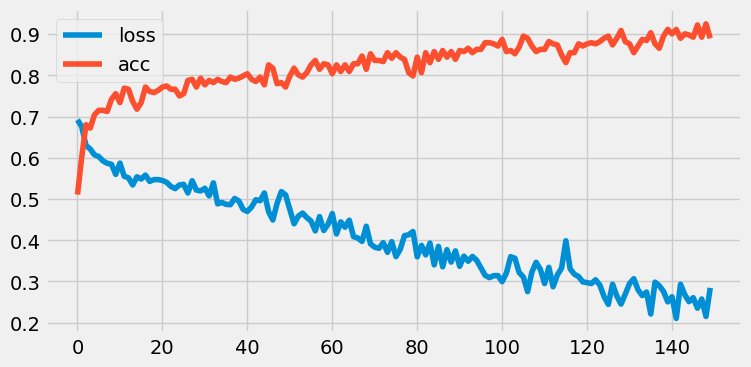

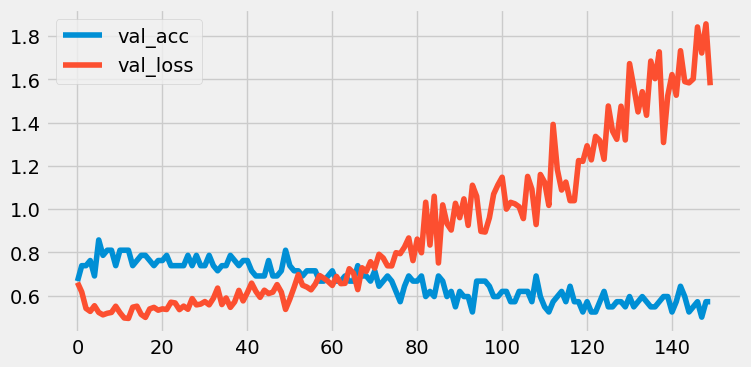

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='acc')
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
scores['DNN'] = model.evaluate(train_x, train_y)[-1]
model.evaluate(test_x, test_y)
dnn_pred = model.predict(test_x)

2/2 [==============================] - 0s 0s/step


## Evaluation

In [22]:
scores

{'SVC': 0.7956989247311828,
 'DTC': 1.0,
 'GBC': 0.9489247311827957,
 'RFC': 1.0,
 'DNN': 0.9193548560142517}

<AxesSubplot:title={'center':'Deep Neural Network - F1: 0.5'}>

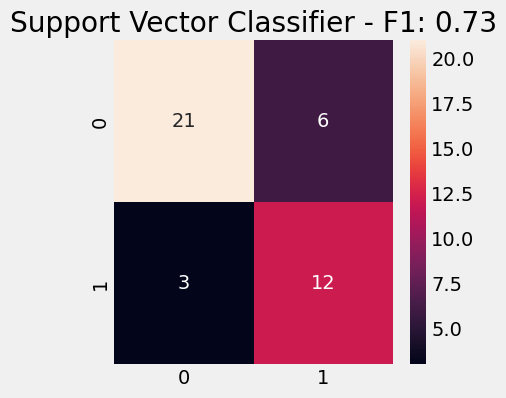

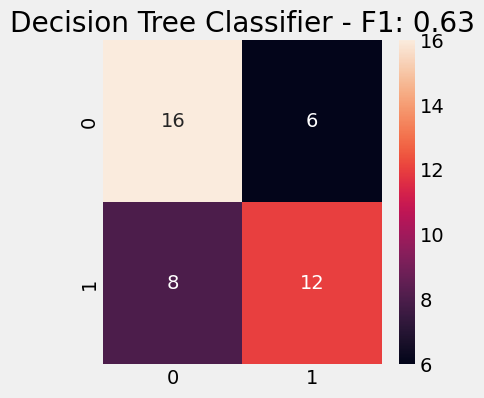

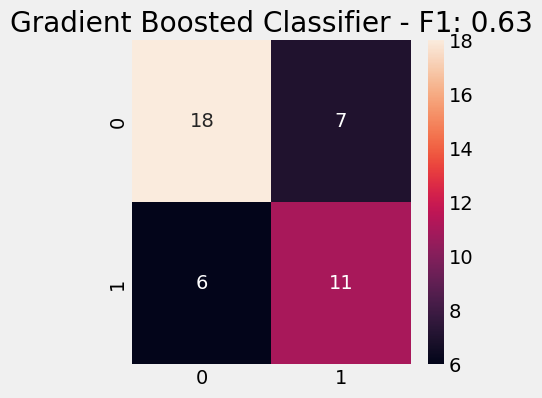

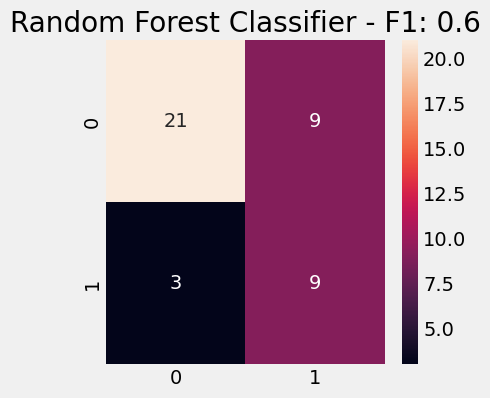

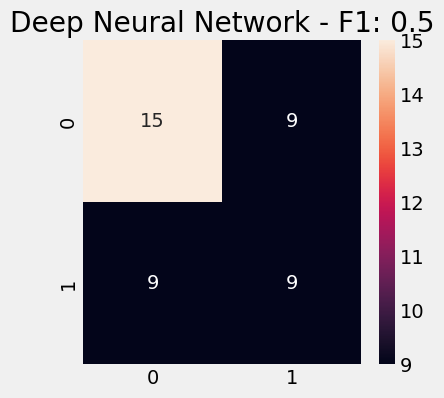

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns

svc_cm = confusion_matrix(svc_pred, test_y)
dtc_cm = confusion_matrix(dtc_pred, test_y)
gbc_cm = confusion_matrix(gbc_pred, test_y)
rfc_cm = confusion_matrix(rfc_pred, test_y)
dnn_cm = confusion_matrix(np.round(dnn_pred), test_y)

plt.figure(figsize=(4,4))
plt.title(f'Support Vector Classifier - F1: {round(f1_score(svc_pred, test_y), 2)}')
sns.heatmap(svc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Decision Tree Classifier - F1: {round(f1_score(dtc_pred, test_y), 2)}')
sns.heatmap(dtc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Gradient Boosted Classifier - F1: {round(f1_score(gbc_pred, test_y), 2)}')
sns.heatmap(gbc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Random Forest Classifier - F1: {round(f1_score(rfc_pred, test_y), 2)}')
sns.heatmap(rfc_cm, annot=True)

plt.figure(figsize=(4,4))
plt.title(f'Deep Neural Network - F1: {round(f1_score(np.round(dnn_pred), test_y), 2)}')
sns.heatmap(dnn_cm, annot=True)